# Copy items-Copy1.csv file into pandas dataframe and 
# replace all fields that are empty with NaN

In [144]:
import pandas as pd
import numpy as np

df_items = pd.read_csv('items-Copy1.csv') # read dataset into pandas dataframe

# replace field that's entirely space (or empty) with NaN
df_items = df_items.replace(np.nan, '', regex=True)

documents = list(df_items['description']) # get only description column and create documents list for this
    
print(documents)

['Black American racial experience is real. We support the 2nd ammendment\nfor our safety.', 'The best costume for Halloween worth posting. Power to the People!', 'Keep on whining and crying for your president, ooh, who wasn\'t elected.\nImma take care of my kids.\n\nI\'ll keep grinding for them, to make sure the get the best education.\nTo ensure they dress well and eat healthy food.\nAnd I\'m gon tell you to do the same thing.\n\nDon\'t waste time on an "afterparty" you wouldn\'t have been invited to!\n\n#word #wakeup #organize #joshuabeal #altonsterling #TerenceCrutCher\n#westandtogether #blacklivesmatter #unite4justice #hovem ber8\n#electi0h52016 #black #melanin #blackisbeautiful #blacklivesmatter\n#blackgirlmagic #USA #blackahdproud #democrat #republioan\n#Africanamerican #unite4justice #vote #breakingnews', "End the whining and crying, end the riots with these same white\npeople(democrats), who will not march with you when your son, daughter or\nloved one gets shot for being Blac

In [145]:
np.random.seed(500)

# Go through all rows in dataframe and check for if
1. anger is in tags
2. anger is not in tags

## This is a binary classification task

In [146]:
labels_list_word = [] # holds list of labels in word form
labels_list_numerical = [] # holds list of labels in numerical form
descriptions_list = [] # holds list of descriptions

# binary classification so either anger or not
for i, row in df_items.iterrows():
    row['tag'] = row['tag'].lower() # convert tags to lowercase
    if 'anger' in row['tag']:
        labels_list_word.append('anger') # anger
        descriptions_list.append(row['description']) # add description
        labels_list_numerical.append(1) # 1
    else:
        labels_list_word.append('none') # not anger
        descriptions_list.append(row['description']) # add description
        labels_list_numerical.append(0) # 0

df_anger = pd.DataFrame() # create empty dataframe
df_anger['label word'] = labels_list_word # append labels_list_word to df with column header 'label word'
df_anger['label numerical'] = labels_list_numerical # append labels_list_numerical to df with column header 'label numerical'
df_anger['description'] = descriptions_list # append descriptions_list to df with column header 'description'
df_anger.loc[df_anger['label word'] == 'anger']

,label word,label numerical,description
1,anger,1,The best costume for Halloween worth posting. ...
2,anger,1,"Keep on whining and crying for your president,..."
3,anger,1,"End the whining and crying, end the riots with..."
7,anger,1,Art imitates life art. This photo is great.
8,anger,1,"In America, racial oppression and racism were ..."
...,...,...,...
2964,anger,1,Officials of the Highlands High School are inv...
2976,anger,1,"Protect the 2nd. Without it, you won't have an..."
2989,anger,1,"Protect the 2nd. Without it, you won't have an..."
2995,anger,1,"Remember folks, dance and music is a large par..."


# Data pre-processing

In [147]:
from nltk.tokenize import word_tokenize
from collections import defaultdict
from nltk.corpus import wordnet as wn
from nltk.stem import WordNetLemmatizer
from nltk import pos_tag
from nltk.corpus import stopwords

# Step - a : Remove blank rows if any.
df_anger['description'].dropna(inplace=True)
# Step - b : Change all the text to lower case. This is required as python interprets 'dog' and 'DOG' differently
df_anger['description'] = [entry.lower() for entry in df_anger['description']]
# Step - c : Tokenization : In this each entry in the corpus will be broken into set of words
df_anger['description']= [word_tokenize(entry) for entry in df_anger['description']]
# Step - d : Remove Stop words, Non-Numeric and perfom Word Stemming/Lemmenting.
# WordNetLemmatizer requires Pos tags to understand if the word is noun or verb or adjective etc. By default it is set to Noun
tag_map = defaultdict(lambda : wn.NOUN)
tag_map['J'] = wn.ADJ
tag_map['V'] = wn.VERB
tag_map['R'] = wn.ADV
for index,entry in enumerate(df_anger['description']):
    # Declaring Empty List to store the words that follow the rules for this step
    Final_words = []
    # Initializing WordNetLemmatizer()
    word_Lemmatized = WordNetLemmatizer()
    # pos_tag function below will provide the 'tag' i.e if the word is Noun(N) or Verb(V) or something else.
    for word, tag in pos_tag(entry):
        # Below condition is to check for Stop words and consider only alphabets
        if word not in stopwords.words('english') and word.isalpha():
            word_Final = word_Lemmatized.lemmatize(word,tag_map[tag[0]])
            Final_words.append(word_Final)
    # The final processed set of words for each iteration will be stored in 'text_final'
    df_anger.loc[index,'description'] = str(Final_words)

In [148]:
df_anger['description']

0       ['black', 'american', 'racial', 'experience', ...
1       ['best', 'costume', 'halloween', 'worth', 'pos...
2       ['keep', 'whining', 'cry', 'president', 'ooh',...
3       ['end', 'whining', 'cry', 'end', 'riot', 'whit...
4       ['black', 'girl', 'definition', 'national', 'g...
                              ...                        
3007         ['new', 'idea', 'old', 'value', 'like', 'u']
3008    ['secure', 'border', 'national', 'priority', '...
3009    ['secured', 'border', 'top', 'priority', 'need...
3010                              ['bernie', 'president']
3011    ['secure', 'border', 'national', 'priority', '...
Name: description, Length: 3012, dtype: object

# Create train test split for classification for anger or not anger

In [149]:
from sklearn import model_selection, naive_bayes, svm

X_train_anger, X_test_anger, Y_train_anger, Y_test_anger = model_selection.train_test_split(df_anger['description'], df_anger['label numerical'],test_size=0.3)

print('Number of rows in the total set for anger: {}'.format(df_anger.shape[0]))
print('Number of rows in the training set for anger: {}'.format(X_train_anger.shape[0]))
print('Number of rows in the test set for anger: {}'.format(X_test_anger.shape[0]))

Number of rows in the total set for anger: 3012
Number of rows in the training set for anger: 2108
Number of rows in the test set for anger: 904


# Ensure that labels are numerical values that the model can understand

In [150]:
from sklearn.preprocessing import LabelEncoder

Encoder = LabelEncoder()
Y_train_anger = Encoder.fit_transform(Y_train_anger)
Y_test_anger = Encoder.fit_transform(Y_test_anger)

# Utilize Term frequency - Inverse Document
2. Term Frequency - Summarizes how often a given word appears within a document
1. Inverse Document Frequency - Down scales words that appear a lot accross documents

### * Essentially highlights words that are more interesting, e.g. frequent in document but not accross all documents

In [151]:
from sklearn.feature_extraction.text import TfidfVectorizer

Tfidf_vect_anger = TfidfVectorizer(max_features=5000)
Tfidf_vect_anger.fit(df_anger['description'])
X_train_Tfidf_anger = Tfidf_vect_anger.transform(X_train_anger)
X_test_Tfidf_anger = Tfidf_vect_anger.transform(X_test_anger)

In [152]:
print(Tfidf_vect_anger.vocabulary_)

{'black': 386, 'american': 140, 'racial': 3201, 'experience': 1534, 'real': 3259, 'support': 4174, 'ammendment': 144, 'safety': 3579, 'best': 344, 'costume': 926, 'halloween': 1854, 'worth': 4938, 'post': 2999, 'power': 3002, 'people': 2897, 'keep': 2240, 'whining': 4857, 'cry': 994, 'president': 3026, 'elect': 1383, 'imma': 2042, 'take': 4250, 'care': 562, 'kid': 2250, 'grind': 1825, 'make': 2444, 'sure': 4186, 'get': 1769, 'education': 1373, 'ensure': 1428, 'dress': 1330, 'well': 4842, 'eat': 1362, 'healthy': 1893, 'food': 1671, 'gon': 1793, 'tell': 4304, 'thing': 4363, 'waste': 4812, 'time': 4393, 'would': 4940, 'invite': 2149, 'word': 4924, 'wakeup': 4787, 'organize': 2798, 'joshuabeal': 2219, 'altonsterling': 129, 'terencecrutcher': 4315, 'westandtogether': 4845, 'blacklivesmatter': 400, 'hovem': 1983, 'melanin': 2521, 'blackisbeautiful': 398, 'blackgirlmagic': 397, 'usa': 4671, 'blackahdproud': 387, 'democrat': 1150, 'republioan': 3388, 'africanamerican': 68, 'vote': 4773, 'break

In [153]:
print(X_train_Tfidf_anger)

  (0, 4734)	0.32355859584434876
  (0, 2973)	0.5036130299523977
  (0, 2755)	0.31019206793966503
  (0, 2450)	0.2917061160661499
  (0, 937)	0.29986872109936524
  (0, 607)	0.4262676067412574
  (0, 386)	0.18453418231560906
  (0, 242)	0.3933115648703152
  (1, 4907)	0.09441773493439476
  (1, 4867)	0.10792848391746224
  (1, 4860)	0.07720333292842713
  (1, 4844)	0.124032698478806
  (1, 4754)	0.1342771658632108
  (1, 4363)	0.0899775210922117
  (1, 4253)	0.10263110191719127
  (1, 4239)	0.1875245429685455
  (1, 4174)	0.07055944904656669
  (1, 4030)	0.07904183002815457
  (1, 3864)	0.11432366245598352
  (1, 3801)	0.08074968941447697
  (1, 3706)	0.10067999994952981
  (1, 3470)	0.07540407296213963
  (1, 3373)	0.10480564870828442
  (1, 3055)	0.10423824668081481
  (1, 3001)	0.1274980034288578
  :	:
  (2106, 1298)	0.20290099098166478
  (2106, 408)	0.2297849693306017
  (2106, 405)	0.2297849693306017
  (2106, 138)	0.12225410921196805
  (2107, 4869)	0.24825720030489087
  (2107, 4092)	0.24825720030489087
  (

In [154]:
!pip3 install matplotlib==3.1.0 # use this version of matplotlib as other version causes problems with seaborn

# Utilize svm from sklearn to create a support vector machine classifier and form predictions

In [155]:
# Classifier - Algorithm - SVM
# fit the training dataset on the classifier
SVM_anger = svm.SVC(C=1.0, kernel='linear', degree=3, gamma='auto')
SVM_anger.fit(X_train_Tfidf_anger,Y_train_anger)

# predict the labels on validation dataset
predictions_SVM_anger = SVM_anger.predict(X_test_Tfidf_anger)

# Print out classification report for anger vs not anger

Classification report for anger classification: 
---------------------------------------------------------- 
              precision    recall  f1-score   support

       anger       0.79      0.91      0.85       667
        none       0.56      0.31      0.40       237

    accuracy                           0.75       904
   macro avg       0.67      0.61      0.62       904
weighted avg       0.73      0.75      0.73       904

---------------------------------------------------------- 
Accuracy score:  0.754424778761062
Precision score:  0.3080168776371308
Recall score:  0.5572519083969466
F1 score:  0.39673913043478265
---------------------------------------------------------- 
Confusion matrix anger: 

[[609  58]
 [164  73]]


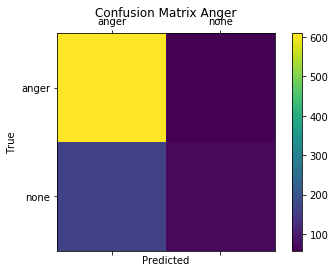

In [156]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sn

print('Classification report for anger classification: ')
print('---------------------------------------------------------- ')
print(classification_report(Y_test_anger, predictions_SVM_anger, target_names = ['anger', 'none']))
print('---------------------------------------------------------- ')
print('Accuracy score: ', format(accuracy_score(predictions_SVM_anger, Y_test_anger)))
print('Precision score: ', format(precision_score(predictions_SVM_anger, Y_test_anger)))
print('Recall score: ', format(recall_score(predictions_SVM_anger, Y_test_anger)))
print('F1 score: ', format(f1_score(predictions_SVM_anger, Y_test_anger)))
print('---------------------------------------------------------- ')

labels = ['anger', 'none']
cm = confusion_matrix(list(Y_test_anger), predictions_SVM_anger)
print("Confusion matrix anger: \n")
print(cm)
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(cm)
plt.title('Confusion Matrix Anger')
fig.colorbar(cax)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.savefig('confusion_matrix_SVM_anger.png')
plt.show()